In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import atan2, degrees
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [12]:
csidf = pd.read_excel("subcarriers_amp_pos_pot.xlsx", sheet_name="subcarriers_amp_pos_pot")
csidf.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
csidf.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0,0,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0,0,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0,0,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0,0,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,DIR,A1,1,3,43,736,16.433430,28.670187,0,0,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214


In [21]:
csidf["local"].unique()

array(['A1', 'B1', 'B2', 'A2', 'B3', 'D3', 'D2', 'D1', 'E1', 'E3', 'E2',
       'A3'], dtype=object)

In [18]:
csidf

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0,0,...,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0,0,...,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0,0,...,21.023796,18.110770,17.464249,15.811388,14.317821,13.453624,12.806248,2.236068,1.000000,1.414214
3,DIR,A1,1,3,82,2482,19.157725,33.949590,0,0,...,21.954498,19.416488,17.029386,15.556349,15.000000,12.649111,12.041595,2.000000,0.000000,1.000000
4,DIR,A1,1,3,43,736,16.433430,28.670187,0,0,...,20.000000,17.492856,15.231546,13.601471,13.152946,13.038405,12.369317,2.236068,1.000000,1.414214
5,DIR,A1,1,3,135,5623,21.331098,37.500181,0,0,...,30.479501,26.870058,24.839485,22.472205,21.470911,20.223748,19.104973,4.000000,2.000000,0.000000
6,DIR,A1,1,3,82,2378,19.140231,33.763877,0,0,...,25.000000,21.931712,19.235384,18.027756,17.691806,16.643317,17.088007,3.162278,2.236068,0.000000
7,DIR,A1,1,3,73,1937,18.674952,32.873499,0,0,...,22.135944,18.788294,17.000000,15.811388,14.142136,12.529964,12.369317,3.162278,1.000000,0.000000
8,DIR,A1,1,3,90,2974,19.579513,34.733625,0,0,...,26.627054,23.430749,21.213203,19.209373,17.492856,16.492423,16.031220,2.000000,0.000000,1.000000
9,DIR,A1,1,3,100,3752,20.003591,35.743739,0,0,...,26.076810,22.825424,20.615528,19.924859,19.416488,18.000000,17.464249,3.162278,1.000000,0.000000


In [76]:
#Divisão dos dados em conjunto de treino e teste
from sklearn.model_selection import train_test_split #Importa a função de split

In [22]:
#Pega apenas os dados do LLTF
datalltf = csidf[csidf.columns[8:70]]
datalltf.head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,LLTF_22,LLTF_23,LLTF_24,LLTF_25,LLTF_26,LLTF_27,LLTF_28,LLTF_29,LLTF_30,LLTF_31
0,0,0,0,0,0,4.123106,15.297059,16.124515,17.029386,18.027756,...,11.180340,10.049876,9.000000,8.062258,7.071068,1.000000,0,0,0,0
1,0,0,0,0,0,5.000000,17.029386,17.117243,18.439089,19.646883,...,13.038405,11.180340,10.198039,9.486833,9.848858,3.162278,0,0,0,0
2,0,0,0,0,0,4.000000,17.029386,17.117243,17.464249,19.924859,...,11.000000,10.049876,9.219544,8.246211,7.615773,1.414214,0,0,0,0
3,0,0,0,0,0,4.123106,17.464249,17.492856,18.601075,20.615528,...,11.661904,10.000000,9.219544,8.485281,7.810250,2.236068,0,0,0,0
4,0,0,0,0,0,3.162278,14.866069,15.524175,16.278821,18.248288,...,10.000000,8.944272,7.615773,7.280110,6.082763,1.000000,0,0,0,0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(datalltf,csidf["local"],
                                                    test_size=0.20)

In [20]:
X_train.head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,LLTF_22,LLTF_23,LLTF_24,LLTF_25,LLTF_26,LLTF_27,LLTF_28,LLTF_29,LLTF_30,LLTF_31
350,0,0,0,0,0,2.236068,10.049876,10.000000,10.049876,11.180340,...,16.031220,14.000000,13.038405,12.041595,11.180340,2.000000,0,0,0,0
106,0,0,0,0,0,4.242641,13.453624,13.601471,14.422205,15.264338,...,19.209373,17.204651,16.643317,15.652476,16.155494,4.472136,0,0,0,0
1260,0,0,0,0,0,6.000000,24.000000,24.083189,24.331050,26.683328,...,12.649111,11.704700,11.704700,11.180340,11.180340,2.828427,0,0,0,0
173,0,0,0,0,0,4.123106,16.278821,16.124515,17.029386,19.026298,...,16.763055,14.317821,13.152946,12.041595,11.000000,2.000000,0,0,0,0
1549,0,0,0,0,0,3.605551,10.295630,11.401754,12.727922,13.601471,...,24.083189,22.022716,20.000000,18.867962,19.235384,5.385165,0,0,0,0


In [58]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]

compare_table.head()

KeyError: 38

In [8]:
#Usando LLTF apenas e não considerando a direção
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        for w in X_train.columns:
            mse_atual += (X_train[w][j] - X_test[w][k])**(2)
        if mse_atual < menor_mse:
            menor_mse = mse_atual
            best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])    

In [9]:
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1

print(x)

C:\Users\PROSAICO07\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PROSAICO07\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\PROSAICO07\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


384


In [10]:
compare_table["acertou"].value_counts()

1    267
0    117
Name: acertou, dtype: int64

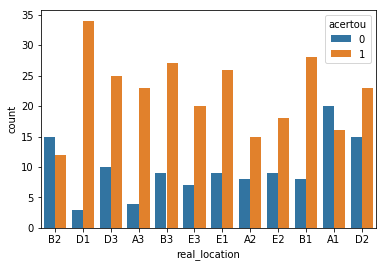

In [11]:
sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [13]:
#Usando LLTF considerando a orientação como uma das entradas!
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        if csidf["device"][k]==csidf["device"][j]:
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])

In [14]:
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1

print(x)

C:\Users\PROSAICO07\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PROSAICO07\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\PROSAICO07\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


384


In [15]:
compare_table["acertou"].value_counts()

1    313
0     71
Name: acertou, dtype: int64

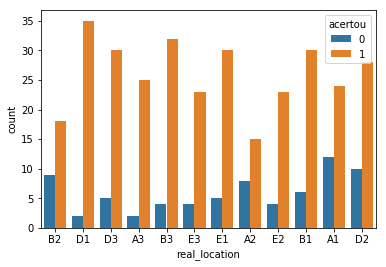

In [16]:
sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [18]:
313/(313+71)

0.8151041666666666

In [79]:
#Separando os dados de treino e teste igualmente em cada posição e direção
colunas = csidf.columns[8:70]
percent_test_train = 0.2
aux = 0
#X_train, X_test, y_train, y_test
for k in csidf["local"].unique():
#     datalltf = csidf[csidf["local"]==k]
    for j in csidf["device"].unique():
#         datalltf = datalltf[datalltf["device"]==j]
        data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
        datalltf= data_y[colunas]
        if aux==0:
            X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
            aux=aux+1
        else:
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
            X_train = X_train.append(X_train_aux)
            X_test = X_test.append(X_test_aux)
            y_train = y_train.append(y_train_aux)
            y_test = y_test.append(y_test_aux)
        


In [80]:
#Usando LLTF apenas e não considerando a direção
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        for w in X_train.columns:
            mse_atual += (X_train[w][j] - X_test[w][k])**(2)
        if mse_atual < menor_mse:
            menor_mse = mse_atual
            best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])    

In [81]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]

compare_table.head()

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,index,real_location,estimated_location,acertou
0,11,A1,NaN,NaN
1,28,A1,NaN,NaN
2,17,A1,NaN,NaN
3,31,A1,NaN,NaN
4,1,A1,NaN,NaN


In [82]:
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1



C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [83]:
print(compare_table["acertou"].value_counts())


1    248
0    136
Name: acertou, dtype: int64


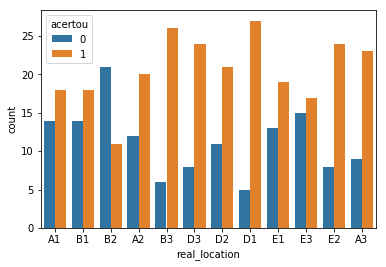

In [84]:
sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [85]:
#Usando LLTF considerando a orientação como uma das entradas!
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        if csidf["device"][k]==csidf["device"][j]:
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])

In [86]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]

compare_table.head()

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,index,real_location,estimated_location,acertou
0,11,A1,NaN,NaN
1,28,A1,NaN,NaN
2,17,A1,NaN,NaN
3,31,A1,NaN,NaN
4,1,A1,NaN,NaN


In [87]:
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [88]:
print(compare_table["acertou"].value_counts())

1    307
0     77
Name: acertou, dtype: int64


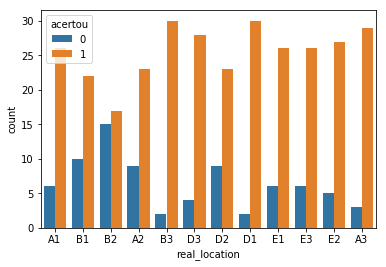

In [89]:
sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [91]:
307/(307+77)

0.7994791666666666

In [101]:
#Separando os dados de treino e teste igualmente em cada posição e direção - LLTF e HT LTF
colunas = csidf.columns[8:134]
percent_test_train = 0.2
aux = 0
#X_train, X_test, y_train, y_test
for k in csidf["local"].unique():
#     datalltf = csidf[csidf["local"]==k]
    for j in csidf["device"].unique():
#         datalltf = datalltf[datalltf["device"]==j]
        data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
        datalltf= data_y[colunas]
        if aux==0:
            X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
            aux=aux+1
        else:
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
            X_train = X_train.append(X_train_aux)
            X_test = X_test.append(X_test_aux)
            y_train = y_train.append(y_train_aux)
            y_test = y_test.append(y_test_aux)

In [102]:
#Usando LLTF + HT LTF apenas e não considerando a direção
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        for w in X_train.columns:
            mse_atual += (X_train[w][j] - X_test[w][k])**(2)
        if mse_atual < menor_mse:
            menor_mse = mse_atual
            best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])    

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A valu

1    269
0    115
Name: acertou, dtype: int64


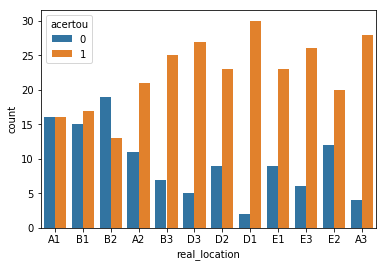

In [103]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]
    
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1
    
print(compare_table["acertou"].value_counts())

sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [105]:
#Separando os dados de treino e teste igualmente em cada posição e direção - somente HT LTF
colunas = csidf.columns[70:134]
percent_test_train = 0.2
aux = 0
#X_train, X_test, y_train, y_test
for k in csidf["local"].unique():
#     datalltf = csidf[csidf["local"]==k]
    for j in csidf["device"].unique():
#         datalltf = datalltf[datalltf["device"]==j]
        data_y = csidf[(csidf["local"]==k) & (csidf["device"]==j)].copy()
        datalltf= data_y[colunas]
        if aux==0:
            X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
            aux=aux+1
        else:
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
            X_train = X_train.append(X_train_aux)
            X_test = X_test.append(X_test_aux)
            y_train = y_train.append(y_train_aux)
            y_test = y_test.append(y_test_aux)

In [106]:
#Usando HT LTF apenas e não considerando a direção
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        for w in X_train.columns:
            mse_atual += (X_train[w][j] - X_test[w][k])**(2)
        if mse_atual < menor_mse:
            menor_mse = mse_atual
            best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])    

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A valu

1    266
0    118
Name: acertou, dtype: int64


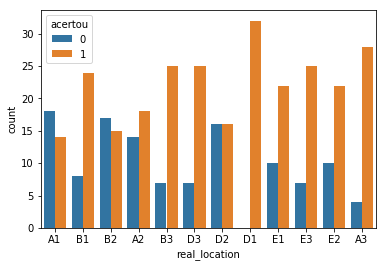

In [107]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]
    
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1
    
print(compare_table["acertou"].value_counts())

sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [108]:
266/(266+118)

0.6927083333333334

In [109]:
#Usando HT LTF considerando a orientação como uma das entradas!
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        if csidf["device"][k]==csidf["device"][j]:
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A valu

1    313
0     71
Name: acertou, dtype: int64


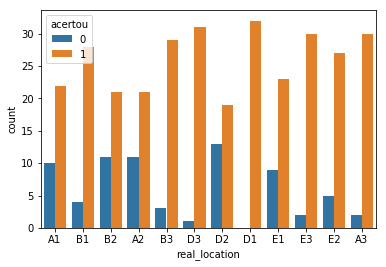

In [110]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]
    
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1
    
print(compare_table["acertou"].value_counts())

sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [111]:
313/(313+71)

0.8151041666666666

In [77]:
##### NORMALIZANDO OS DADOS!!
from sklearn.preprocessing import StandardScaler #Importa o standardscaler do scikit-learn
scaler = StandardScaler() #Cria um objet StandardScaler()  chamado scaler

In [78]:
csidf.drop(csidf.columns[:8],axis=1).head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,LLTF_-22,LLTF_-21,LLTF_-20,LLTF_-19,LLTF_-18,LLTF_-17,LLTF_-16,LLTF_-15,LLTF_-14,LLTF_-13,LLTF_-12,LLTF_-11,LLTF_-10,LLTF_-9,LLTF_-8,LLTF_-7,LLTF_-6,LLTF_-5,LLTF_-4,LLTF_-3,LLTF_-2,LLTF_-1,LLTF_2,LLTF_3,LLTF_4,LLTF_5,LLTF_6,LLTF_7,LLTF_8,LLTF_9,LLTF_10,LLTF_11,LLTF_12,LLTF_13,LLTF_14,LLTF_15,LLTF_16,LLTF_17,LLTF_18,LLTF_19,LLTF_20,LLTF_21,LLTF_22,LLTF_23,LLTF_24,LLTF_25,LLTF_26,LLTF_27,LLTF_28,LLTF_29,LLTF_30,LLTF_31,HTLTF_-32,HTLTF_-31,HTLTF_-30,HTLTF_-29,HTLTF_-28,HTLTF_-27,HTLTF_-26,HTLTF_-25,HTLTF_-24,HTLTF_-23,HTLTF_-22,HTLTF_-21,HTLTF_-20,HTLTF_-19,HTLTF_-18,HTLTF_-17,HTLTF_-16,HTLTF_-15,HTLTF_-14,HTLTF_-13,HTLTF_-12,HTLTF_-11,HTLTF_-10,HTLTF_-9,HTLTF_-8,HTLTF_-7,HTLTF_-6,HTLTF_-5,HTLTF_-4,HTLTF_-3,HTLTF_-2,HTLTF_-1,HTLTF_0,HTLTF_1,HTLTF_2,HTLTF_3,HTLTF_4,HTLTF_5,HTLTF_6,HTLTF_7,HTLTF_8,HTLTF_9,HTLTF_10,HTLTF_11,HTLTF_12,HTLTF_13,HTLTF_14,HTLTF_15,HTLTF_16,HTLTF_17,HTLTF_18,HTLTF_19,HTLTF_20,HTLTF_21,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,0,0,0,0,0,4.123106,15.297059,16.124515,17.029386,18.027756,20.223748,22.803509,24.351591,24.596748,24.698178,23.600847,23.600847,22.203603,21.633308,21.095023,20.591260,21.023796,21.540659,22.135944,22.803509,23.345235,24.186773,24.083189,25.079872,26.019224,26.019224,27.018512,25.000000,24.000000,22.000000,21.023796,20.099751,19.235384,17.464249,16.763055,16.155494,15.231546,14.764823,14.764823,14.422205,14.422205,15.000000,15.000000,15.264338,14.764823,13.928388,12.369317,11.180340,10.049876,9.000000,8.062258,7.071068,1.000000,0,0,0,0,1.000000,1.414214,2.000000,5.656854,29.832868,29.068884,30.805844,32.140317,34.000000,37.215588,40.792156,43.965896,47.010637,48.373546,48.010416,47.010637,45.453273,42.638011,41.400483,41.048752,39.962482,40.706265,41.231056,42.379240,43.680659,45.122057,46.690470,48.507731,49.365980,50.249378,50.159745,50.089919,15.033296,50.089919,48.041649,46.043458,43.011626,41.012193,39.115214,36.221541,34.525353,32.015621,30.364453,30.083218,29.546573,29.068884,28.653098,29.154759,29.681644,29.154759,29.529646,28.231188,27.202941,24.515301,22.090722,19.000000,17.029386,15.132746,14.560220,12.806248,13.601471,2.236068,0.000000,1.414214
1,0,0,0,0,0,5.000000,17.029386,17.117243,18.439089,19.646883,22.135944,24.166092,26.076810,26.400758,26.172505,25.455844,24.041631,23.345235,22.627417,22.671568,22.022716,22.203603,22.472205,22.825424,24.166092,24.698178,25.298221,25.298221,25.961510,26.683328,27.658633,27.658633,25.495098,24.331050,24.331050,22.203603,21.095023,20.024984,19.000000,18.027756,17.117243,17.262677,16.492423,15.811388,14.866069,15.231546,16.155494,16.155494,16.763055,16.492423,15.132746,14.000000,13.038405,11.180340,10.198039,9.486833,9.848858,3.162278,0,0,0,0,1.000000,0.000000,2.236068,5.830952,29.154759,29.410882,32.000000,33.241540,35.693137,38.327536,42.720019,46.518813,48.548944,49.819675,49.517674,48.795492,46.690470,44.553339,43.139309,42.520583,42.638011,42.201896,42.190046,43.829214,44.777226,45.880279,47.434165,49.040799,50.695167,52.392748,51.971146,51.788030,16.492423,51.971146,49.819675,47.675990,45.541190,43.289722,41.109610,38.013156,37.013511,35.128336,33.376639,32.756679,31.048349,30.675723,30.083218,30.463092,30.463092,31.384710,31.622777,30.805844,29.274562,27.018512,24.083189,22.203603,19.416488,17.720045,17.464249,15.620499,15.000000,3.605551,2.236068,0.000000
2,0,0,0,0,0,4.000000,17.029386,17.117243,17.464249,19.924859,21.931712,23.706539,25.806976,27.658633,26.870058,25.495098,24.839485,24.083189,23.345235,22.627417,22.671568,22.022716,22.472205,23.323808,23.706539,24.166092,24.698178,25.298221,26.248809,25.961510,26.925824,26.683328,25.495098,24.515301,23.345235,21.213203,20.099751,19.026298,18.000000,17.029386,16.124515,15.524175,14.866069,13.928388,14.317821,14.317821,14.317821,14.317821,15.231546,14.866069,14.317821,13.038405,11.000000,10.049876,9.219544,8.246211,7.615773,1.414214,0,0,0

In [79]:
scaler.fit(csidf.drop(csidf.columns[:8],axis=1)) #Usa o método fit para treinar o modelo

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
#** Use o método .transform () para transformar os parâmetros em uma versão padronizada. **
scaled_features = scaler.transform(csidf.drop(csidf.columns[:8],axis=1))

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [81]:
#** Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou. **
df_feat = pd.DataFrame(scaled_features,columns=csidf.columns[8:])
df_feat.head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,LLTF_-22,LLTF_-21,LLTF_-20,LLTF_-19,LLTF_-18,LLTF_-17,LLTF_-16,LLTF_-15,LLTF_-14,LLTF_-13,LLTF_-12,LLTF_-11,LLTF_-10,LLTF_-9,LLTF_-8,LLTF_-7,LLTF_-6,LLTF_-5,LLTF_-4,LLTF_-3,LLTF_-2,LLTF_-1,LLTF_2,LLTF_3,LLTF_4,LLTF_5,LLTF_6,LLTF_7,LLTF_8,LLTF_9,LLTF_10,LLTF_11,LLTF_12,LLTF_13,LLTF_14,LLTF_15,LLTF_16,LLTF_17,LLTF_18,LLTF_19,LLTF_20,LLTF_21,LLTF_22,LLTF_23,LLTF_24,LLTF_25,LLTF_26,LLTF_27,LLTF_28,LLTF_29,LLTF_30,LLTF_31,HTLTF_-32,HTLTF_-31,HTLTF_-30,HTLTF_-29,HTLTF_-28,HTLTF_-27,HTLTF_-26,HTLTF_-25,HTLTF_-24,HTLTF_-23,HTLTF_-22,HTLTF_-21,HTLTF_-20,HTLTF_-19,HTLTF_-18,HTLTF_-17,HTLTF_-16,HTLTF_-15,HTLTF_-14,HTLTF_-13,HTLTF_-12,HTLTF_-11,HTLTF_-10,HTLTF_-9,HTLTF_-8,HTLTF_-7,HTLTF_-6,HTLTF_-5,HTLTF_-4,HTLTF_-3,HTLTF_-2,HTLTF_-1,HTLTF_0,HTLTF_1,HTLTF_2,HTLTF_3,HTLTF_4,HTLTF_5,HTLTF_6,HTLTF_7,HTLTF_8,HTLTF_9,HTLTF_10,HTLTF_11,HTLTF_12,HTLTF_13,HTLTF_14,HTLTF_15,HTLTF_16,HTLTF_17,HTLTF_18,HTLTF_19,HTLTF_20,HTLTF_21,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,0.0,0.0,0.0,0.0,0.0,0.182844,-0.015516,0.149067,0.201551,0.125525,0.220408,0.378532,0.441355,0.430018,0.542776,0.474490,0.695831,0.569127,0.616195,0.615657,0.511396,0.592377,0.649899,0.673992,0.659912,0.595874,0.568826,0.209442,0.248345,0.260416,-0.030154,0.092781,-0.349344,-0.431501,-0.762812,-0.744329,-0.696070,-0.658183,-0.949452,-0.938522,-0.974387,-1.136861,-1.187893,-1.178989,-1.331678,-1.420704,-1.394495,-1.495583,-1.508330,-1.573151,-1.604145,-1.701465,-1.680485,-1.633321,-1.629597,-1.694323,-1.835457,-2.275956,0.0,0.0,0.0,0.0,-0.165233,0.950728,0.085020,0.211431,0.200188,0.165319,0.248292,0.319933,0.366787,0.484183,0.506044,0.493034,0.571922,0.636485,0.669166,0.723656,0.767174,0.663358,0.693062,0.757143,0.648610,0.729539,0.714319,0.724794,0.711827,0.683607,0.649647,0.617734,0.475368,0.365202,0.191447,0.114649,-0.246460,-0.063764,-0.137714,-0.166209,-0.331052,-0.341540,-0.364560,-0.535363,-0.568734,-0.746370,-0.848816,-0.809104,-0.838562,-0.917911,-1.040296,-1.074865,-1.138914,-1.312602,-1.337156,-1.457092,-1.451610,-1.534009,-1.535694,-1.607707,-1.629812,-1.692946,-1.651328,-1.755265,-1.656862,-1.749149,-2.371981,0.906988
1,0.0,0.0,0.0,0.0,0.0,0.877877,0.365508,0.371093,0.517897,0.477087,0.616023,0.649213,0.781316,0.796759,0.857766,0.893903,0.801903,0.863585,0.890489,1.074088,0.936571,0.952149,0.940129,0.891875,1.094789,1.028597,0.925969,0.598251,0.529914,0.471919,0.487419,0.291939,-0.194189,-0.329094,-0.045395,-0.381707,-0.389713,-0.417243,-0.485580,-0.560485,-0.687980,-0.537711,-0.689952,-0.888989,-1.214543,-1.220554,-1.126972,-1.247943,-1.211884,-1.255383,-1.390293,-1.407552,-1.326847,-1.402806,-1.373996,-1.390462,-1.261571,-0.656046,0.0,0.0,0.0,0.0,-0.165233,-1.762477,0.358776,0.305724,0.126941,0.203860,0.382517,0.444252,0.555481,0.605269,0.705665,0.745945,0.721758,0.779371,0.823922,0.916658,0.909509,0.898122,0.918678,0.956608,1.021103,0.941576,0.851401,0.931345,0.866401,0.789396,0.752220,0.690068,0.652292,0.646770,0.426463,0.334070,0.338023,0.176918,0.095188,0.051859,0.014768,-0.025677,-0.083009,-0.280122,-0.211585,-0.296789,-0.413220,-0.421663,-0.623806,-0.693900,-0.848570,-0.908903,-1.046344,-1.067334,-1.122095,-1.206374,-1.254185,-1.290443,-1.331682,-1.260266,-1.363416,-1.398726,-1.319093,-1.434603,-1.503478,-0.992786,0.253550,-1.849046
2,0.0,0.0,0.0,0.0,0.0,0.085269,0.365508,0.371093,0.299137,0.537445,0.573770,0.557922,0.728144,1.052475,1.006799,0.902778,0.993903,1.053923,1.088550,1.061250,1.129295,0.896989,0.940129,1.049370,0.948120,0.858415,0.733156,0.598251,0.621669,0.242035,0.256066,-0.011503,-0.194189,-0.272097,-0.348795,-0.686113,-0.696070,-0.721984,-0.787629,-0.858912,-0.983613,-1.050541,-1.158711,-1.410763,-1.359225,-1.446518,-1.552435,-1.641785,-1.514817,-1.554528,-1.534995,-1.580869,-1.714808,-1.633321,-1.582758,-1.655086,-1.722922,-1.965640,0.0,0.0,0.0,0.0,0.458276,0.156048,-1.074625,-0.144330,0.072754,0.171129,0.384

In [82]:
csidf_norm = csidf[csidf.columns[0:8]]
csidf_norm.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF
0,DIR,A1,1,3,68,1763,18.326305,32.462711
1,DIR,A1,1,3,91,2902,19.625982,34.627993
2,DIR,A1,1,3,79,1819,19.009755,32.599737
3,DIR,A1,1,3,82,2482,19.157725,33.949590
4,DIR,A1,1,3,43,736,16.433430,28.670187


In [83]:
csidf_norm = pd.concat([csidf_norm, df_feat], axis=1)
csidf_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Columns: 134 entries, device to HTLTF_31
dtypes: float64(128), int64(4), object(2)
memory usage: 2.0+ MB


In [84]:
csidf_norm.head()

,device,local,x,y,P_MW_LLTF,P_MW_HTLTF,P_DBM_LLTF,P_DBM_HTLTF,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,LLTF_-22,LLTF_-21,LLTF_-20,LLTF_-19,LLTF_-18,LLTF_-17,LLTF_-16,LLTF_-15,LLTF_-14,LLTF_-13,LLTF_-12,LLTF_-11,LLTF_-10,LLTF_-9,LLTF_-8,LLTF_-7,LLTF_-6,LLTF_-5,LLTF_-4,LLTF_-3,LLTF_-2,LLTF_-1,LLTF_2,LLTF_3,LLTF_4,LLTF_5,LLTF_6,LLTF_7,LLTF_8,LLTF_9,LLTF_10,LLTF_11,LLTF_12,LLTF_13,LLTF_14,LLTF_15,LLTF_16,LLTF_17,LLTF_18,LLTF_19,LLTF_20,LLTF_21,LLTF_22,LLTF_23,LLTF_24,LLTF_25,LLTF_26,LLTF_27,LLTF_28,LLTF_29,LLTF_30,LLTF_31,HTLTF_-32,HTLTF_-31,HTLTF_-30,HTLTF_-29,HTLTF_-28,HTLTF_-27,HTLTF_-26,HTLTF_-25,HTLTF_-24,HTLTF_-23,HTLTF_-22,HTLTF_-21,HTLTF_-20,HTLTF_-19,HTLTF_-18,HTLTF_-17,HTLTF_-16,HTLTF_-15,HTLTF_-14,HTLTF_-13,HTLTF_-12,HTLTF_-11,HTLTF_-10,HTLTF_-9,HTLTF_-8,HTLTF_-7,HTLTF_-6,HTLTF_-5,HTLTF_-4,HTLTF_-3,HTLTF_-2,HTLTF_-1,HTLTF_0,HTLTF_1,HTLTF_2,HTLTF_3,HTLTF_4,HTLTF_5,HTLTF_6,HTLTF_7,HTLTF_8,HTLTF_9,HTLTF_10,HTLTF_11,HTLTF_12,HTLTF_13,HTLTF_14,HTLTF_15,HTLTF_16,HTLTF_17,HTLTF_18,HTLTF_19,HTLTF_20,HTLTF_21,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,DIR,A1,1,3,68,1763,18.326305,32.462711,0.0,0.0,0.0,0.0,0.0,0.182844,-0.015516,0.149067,0.201551,0.125525,0.220408,0.378532,0.441355,0.430018,0.542776,0.474490,0.695831,0.569127,0.616195,0.615657,0.511396,0.592377,0.649899,0.673992,0.659912,0.595874,0.568826,0.209442,0.248345,0.260416,-0.030154,0.092781,-0.349344,-0.431501,-0.762812,-0.744329,-0.696070,-0.658183,-0.949452,-0.938522,-0.974387,-1.136861,-1.187893,-1.178989,-1.331678,-1.420704,-1.394495,-1.495583,-1.508330,-1.573151,-1.604145,-1.701465,-1.680485,-1.633321,-1.629597,-1.694323,-1.835457,-2.275956,0.0,0.0,0.0,0.0,-0.165233,0.950728,0.085020,0.211431,0.200188,0.165319,0.248292,0.319933,0.366787,0.484183,0.506044,0.493034,0.571922,0.636485,0.669166,0.723656,0.767174,0.663358,0.693062,0.757143,0.648610,0.729539,0.714319,0.724794,0.711827,0.683607,0.649647,0.617734,0.475368,0.365202,0.191447,0.114649,-0.246460,-0.063764,-0.137714,-0.166209,-0.331052,-0.341540,-0.364560,-0.535363,-0.568734,-0.746370,-0.848816,-0.809104,-0.838562,-0.917911,-1.040296,-1.074865,-1.138914,-1.312602,-1.337156,-1.457092,-1.451610,-1.534009,-1.535694,-1.607707,-1.629812,-1.692946,-1.651328,-1.755265,-1.656862,-1.749149,-2.371981,0.906988
1,DIR,A1,1,3,91,2902,19.625982,34.627993,0.0,0.0,0.0,0.0,0.0,0.877877,0.365508,0.371093,0.517897,0.477087,0.616023,0.649213,0.781316,0.796759,0.857766,0.893903,0.801903,0.863585,0.890489,1.074088,0.936571,0.952149,0.940129,0.891875,1.094789,1.028597,0.925969,0.598251,0.529914,0.471919,0.487419,0.291939,-0.194189,-0.329094,-0.045395,-0.381707,-0.389713,-0.417243,-0.485580,-0.560485,-0.687980,-0.537711,-0.689952,-0.888989,-1.214543,-1.220554,-1.126972,-1.247943,-1.211884,-1.255383,-1.390293,-1.407552,-1.326847,-1.402806,-1.373996,-1.390462,-1.261571,-0.656046,0.0,0.0,0.0,0.0,-0.165233,-1.762477,0.358776,0.305724,0.126941,0.203860,0.382517,0.444252,0.555481,0.605269,0.705665,0.745945,0.721758,0.779371,0.823922,0.916658,0.909509,0.898122,0.918678,0.956608,1.021103,0.941576,0.851401,0.931345,0.866401,0.789396,0.752220,0.690068,0.652292,0.646770,0.426463,0.334070,0.338023,0.176918,0.095188,0.051859,0.014768,-0.025677,-0.083009,-0.280122,-0.211585,-0.296789,-0.413220,-0.421663,-0.623806,-0.693900,-0.848570,-0.908903,-1.046344,-1.067334,-1.122095,-1.206374,-1.254185,-1.290443,-1.331682,-1.260266,-1.363416,-1.398726,-1.319093,-1.434603,-1.503478,-0.992786,0.253550,-1.849046
2,DIR,A1,1,3,79,1819,19.009755,32.599737,0.0,0.0,0.0,0.0,0.0,0.085269,0.365508,0.371093,0.299137,0.537445,0.573770,0.557922,0.728144,1.052475,1.006799,0.902778,0.993903,1.053923,1.088550,1.061250,1.129295,0.896989,0.940129,1.049370,0.948120,0.858415,0.733156,0.598251,0.621669,0.242035,0.256066,-0.011503,-0.194189,-0.272097,-0.348795,-0.686113,-0.696070,-0.721984,-0.787629,-0.858912,-0.983613,-1.050541,-1.158711,-1.410763,-1.359225,-1.446518,-1.552435,-1.641785

In [85]:
#Separando os dados de treino e teste igualmente em cada posição e direção - somente normalizado
colunas = csidf.columns[8:134]
percent_test_train = 0.2
aux = 0
#X_train, X_test, y_train, y_test
for k in csidf["local"].unique():
#     datalltf = csidf[csidf["local"]==k]
    for j in csidf["device"].unique():
#         datalltf = datalltf[datalltf["device"]==j]
        data_y = csidf_norm[(csidf_norm["local"]==k) & (csidf_norm["device"]==j)].copy()
        datalltf= data_y[colunas]
        if aux==0:
            X_train, X_test, y_train, y_test = train_test_split(datalltf,data_y["local"],test_size=0.2)
            aux=aux+1
        else:
            X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(datalltf,data_y["local"],test_size=0.2)
            X_train = X_train.append(X_train_aux)
            X_test = X_test.append(X_test_aux)
            y_train = y_train.append(y_train_aux)
            y_test = y_test.append(y_test_aux)

In [23]:
#Usando HT LTF considerando a orientação como uma das entradas!
minmeansquareerror = []
best_index_match = []
best_atual_index = 0
menor_mse = 10000
mse_atual = 0
for k  in X_test.index:
# k = X_test.index[3]
    menor_mse = 10000
    best_atual_index = 0
    for j in X_train.index:
        mse_atual = 0
        if csidf_norm["device"][k]==csidf_norm["device"][j]:
            for w in X_train.columns:
                mse_atual += (X_train[w][j] - X_test[w][k])**(2)
            if mse_atual < menor_mse:
                menor_mse = mse_atual
                best_atual_index = j
    minmeansquareerror.append(menor_mse)
    best_index_match.append(best_atual_index)
# print(minmeansquareerror)
# print(best_index_match)
# print("A localização real é:" + y_test[k])
# print("A resposta do algoritmo deu:" + y_train[best_index_match])

In [24]:
colunas = ["index","real_location","estimated_location","acertou"]
compare_table = pd.DataFrame(columns=colunas)
compare_table["index"] = y_test.index
for x in range(len(compare_table)):
    compare_table["real_location"][x]=y_test[y_test.index[x]]

C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\iande\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1    311
0     73
Name: acertou, dtype: int64


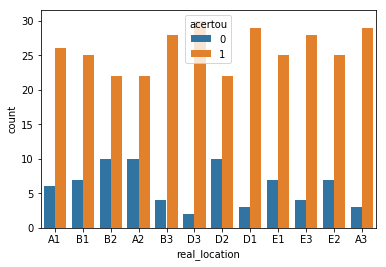

In [25]:
x=0
for i in best_index_match:
    compare_table["estimated_location"][x] = y_train[i]
    if(compare_table["estimated_location"][x] == compare_table["real_location"][x]):
        compare_table["acertou"][x]=1
    else:
        compare_table["acertou"][x]=0
    x=x+1
    
print(compare_table["acertou"].value_counts())

sns.countplot(x="real_location",hue="acertou",data=compare_table)

In [54]:
X_train.head()

,LLTF_-32,LLTF_-31,LLTF_-30,LLTF_-29,LLTF_-28,LLTF_-27,LLTF_-26,LLTF_-25,LLTF_-24,LLTF_-23,...,HTLTF_22,HTLTF_23,HTLTF_24,HTLTF_25,HTLTF_26,HTLTF_27,HTLTF_28,HTLTF_29,HTLTF_30,HTLTF_31
0,0.0,0.0,0.0,0.0,0.0,0.182844,-0.015516,0.149067,0.201551,0.125525,...,-1.535694,-1.607707,-1.629812,-1.692946,-1.651328,-1.755265,-1.656862,-1.749149,-2.371981,0.906988
16,0.0,0.0,0.0,0.0,0.0,1.183162,0.793151,0.862226,0.896139,0.978142,...,-1.551976,-1.582179,-1.672897,-1.637480,-1.699158,-1.685742,-1.706054,-1.237605,-1.197808,-1.849046
8,0.0,0.0,0.0,0.0,0.0,0.459488,0.365508,0.338288,0.517897,0.553760,...,-1.071211,-1.127179,-1.162906,-1.229364,-1.315820,-1.335254,-1.390379,-1.879529,-2.371981,0.099764
39,0.0,0.0,0.0,0.0,0.0,0.459488,0.359045,0.455100,0.554248,0.521067,...,-1.780719,-1.824614,-1.826788,-1.867078,-1.939470,-1.981965,-2.003563,-2.203058,-2.371981,0.099764
34,0.0,0.0,0.0,0.0,0.0,-0.227374,0.227344,0.183578,0.201551,0.250010,...,-1.749767,-1.902828,-1.871234,-2.025703,-1.934728,-1.940525,-2.046384,-2.203058,-1.197808,0.906988


In [55]:
#### Usando SVC (Support Vector Classifier)
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
#### PREDICOES SVC #####
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[20  1  2  1  0  1  1  0  1  1  1  3]
 [ 0 16  0  1  1  1  5  1  2  3  1  1]
 [ 0  1 23  3  1  0  1  0  3  0  0  0]
 [ 3  0  1 18  1  5  0  1  2  0  1  0]
 [ 2  0  2  0  9  3  5  1  1  4  2  3]
 [ 4  0  3  0  0 18  0  2  5  0  0  0]
 [ 0  0  0  0  0  0 27  1  0  1  3  0]
 [ 0  1  5  0  0  3  5 17  1  0  0  0]
 [ 0  1  1  0  0  3  1  0 26  0  0  0]
 [ 1  1  0  0  0  4  1  0  3 22  0  0]
 [ 1  1  3  1  0  0  3  0  1  2 20  0]
 [ 0  0  3  0  0  1  1  0  0  0  0 27]]


              precision    recall  f1-score   support

          A1       0.65      0.62      0.63        32
          A2       0.73      0.50      0.59        32
          A3       0.53      0.72      0.61        32
          B1       0.75      0.56      0.64        32
          B2       0.75      0.28      0.41        32
          B3       0.46      0.56      0.51        32
          D1       0.54      0.84      0.66        32
          D2       0.74      0.53      0.62        32
          D3       0.58      0.81      0.6

In [57]:
k=['rbf', 'linear','poly','sigmoid']
c= range(1,1000)
g=np.arange(0.0001,1,0.001)
g=g.tolist()

In [58]:
#Gridsearch#
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
# param_grid=dict(kernel=k, C=c, gamma=g)
param_grid = {'C': [0.1,1, 10,25,50,75,100,500, 1000], 'gamma': [1,0.8,0.6,0.5,0.3,0.2,0.1,0.05,0.01,0.001,0.0001], 'kernel': ['rbf', 'linear','poly','sigmoid']}
print(param_grid)

{'C': [0.1, 1, 10, 25, 50, 75, 100, 500, 1000], 'gamma': [1, 0.8, 0.6, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}


In [59]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [60]:
# Talvez demore um pouco
grid.fit(X_train,y_train)

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 396 candidates, totalling 1188 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.10077519379844961, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.11434108527131782, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.09523809523809523, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ........ C=0.1, gamma=1, kernel=linear, score=0.25, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.29651162790697677, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.26587301587301587, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ...........

[CV]  C=0.1, gamma=0.3, kernel=sigmoid, score=0.1124031007751938, total=   0.2s
[CV] C=0.1, gamma=0.3, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.3, kernel=sigmoid, score=0.07936507936507936, total=   0.2s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.2, kernel=rbf, score=0.19186046511627908, total=   0.2s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.2, kernel=rbf, score=0.14922480620155038, total=   0.3s
[CV] C=0.1, gamma=0.2, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.2, kernel=rbf, score=0.20634920634920634, total=   0.3s
[CV] C=0.1, gamma=0.2, kernel=linear .................................
[CV] ...... C=0.1, gamma=0.2, kernel=linear, score=0.25, total=   0.1s
[CV] C=0.1, gamma=0.2, kernel=linear .................................
[CV]  C=0.1, gamma=0.2, kernel=linear, score=0.29651162790697677, total=   0.1s
[CV] C=0.1, gamma=0.2, kernel=l

[CV]  C=0.1, gamma=0.001, kernel=linear, score=0.26587301587301587, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, score=0.12403100775193798, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, score=0.13953488372093023, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV]  C=0.1, gamma=0.001, kernel=poly, score=0.10119047619047619, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.001, kernel=sigmoid, score=0.14147286821705427, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.001, kernel=sigmoid, score=0.1375968992248062, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=0.1, gamma=0.001, kernel=sigmoid, score=0.12103174603174603, total=   0.2s
[CV]

[CV]  C=1, gamma=0.5, kernel=rbf, score=0.313953488372093, total=   0.3s
[CV] C=1, gamma=0.5, kernel=rbf ......................................
[CV]  C=1, gamma=0.5, kernel=rbf, score=0.2003968253968254, total=   0.3s
[CV] C=1, gamma=0.5, kernel=linear ...................................
[CV]  C=1, gamma=0.5, kernel=linear, score=0.3178294573643411, total=   0.3s
[CV] C=1, gamma=0.5, kernel=linear ...................................
[CV]  C=1, gamma=0.5, kernel=linear, score=0.3430232558139535, total=   0.3s
[CV] C=1, gamma=0.5, kernel=linear ...................................
[CV]  C=1, gamma=0.5, kernel=linear, score=0.3055555555555556, total=   0.2s
[CV] C=1, gamma=0.5, kernel=poly .....................................
[CV]  C=1, gamma=0.5, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=1, gamma=0.5, kernel=poly .....................................
[CV]  C=1, gamma=0.5, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=1, gamma=0.5, kernel=poly .............

[CV]  C=1, gamma=0.05, kernel=sigmoid, score=0.04844961240310078, total=   0.2s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV]  C=1, gamma=0.05, kernel=sigmoid, score=0.09496124031007752, total=   0.2s
[CV] C=1, gamma=0.05, kernel=sigmoid .................................
[CV]  C=1, gamma=0.05, kernel=sigmoid, score=0.0873015873015873, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.27906976744186046, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.35271317829457366, total=   0.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.2876984126984127, total=   0.1s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.3178294573643411, total=   0.3s
[CV] C=1, gamma=0.01, kernel=l

[CV]  C=10, gamma=0.8, kernel=linear, score=0.2718253968253968, total=   0.6s
[CV] C=10, gamma=0.8, kernel=poly ....................................
[CV]  C=10, gamma=0.8, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=10, gamma=0.8, kernel=poly ....................................
[CV]  C=10, gamma=0.8, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=10, gamma=0.8, kernel=poly ....................................
[CV]  C=10, gamma=0.8, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=10, gamma=0.8, kernel=sigmoid .................................
[CV]  C=10, gamma=0.8, kernel=sigmoid, score=0.0755813953488372, total=   0.1s
[CV] C=10, gamma=0.8, kernel=sigmoid .................................
[CV]  C=10, gamma=0.8, kernel=sigmoid, score=0.08914728682170543, total=   0.1s
[CV] C=10, gamma=0.8, kernel=sigmoid .................................
[CV]  C=10, gamma=0.8, kernel=sigmoid, score=0.06944444444444445, total=   0.1s
[CV] C=10, gamma=0.6, kernel=

[CV]  C=10, gamma=0.1, kernel=rbf, score=0.5290697674418605, total=   0.3s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.2757936507936508, total=   0.3s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.2868217054263566, total=   0.8s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.32751937984496127, total=   1.1s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.2718253968253968, total=   0.7s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=10, gamma=0.1, kernel=poly ...

[CV]  C=10, gamma=0.0001, kernel=poly, score=0.10119047619047619, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=10, gamma=0.0001, kernel=sigmoid, score=0.12015503875968993, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=10, gamma=0.0001, kernel=sigmoid, score=0.17829457364341086, total=   0.2s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV]  C=10, gamma=0.0001, kernel=sigmoid, score=0.12896825396825398, total=   0.2s
[CV] C=25, gamma=1, kernel=rbf .......................................
[CV]  C=25, gamma=1, kernel=rbf, score=0.14728682170542637, total=   0.3s
[CV] C=25, gamma=1, kernel=rbf .......................................
[CV]  C=25, gamma=1, kernel=rbf, score=0.20930232558139536, total=   0.3s
[CV] C=25, gamma=1, kernel=rbf .......................................
[CV]  C=25, gamma=1, kernel=rbf, score=0.14682539682539683, total=   0.3s
[CV] C=25, gamma=1, ker

[CV]  C=25, gamma=0.3, kernel=linear, score=0.3449612403100775, total=   1.3s
[CV] C=25, gamma=0.3, kernel=linear ..................................
[CV]  C=25, gamma=0.3, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=25, gamma=0.3, kernel=poly ....................................
[CV]  C=25, gamma=0.3, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=25, gamma=0.3, kernel=poly ....................................
[CV]  C=25, gamma=0.3, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=25, gamma=0.3, kernel=poly ....................................
[CV]  C=25, gamma=0.3, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=25, gamma=0.3, kernel=sigmoid .................................
[CV]  C=25, gamma=0.3, kernel=sigmoid, score=0.06589147286821706, total=   0.2s
[CV] C=25, gamma=0.3, kernel=sigmoid .................................
[CV]  C=25, gamma=0.3, kernel=sigmoid, score=0.09883720930232558, total=   0.1s
[CV] C=25, gamma=0.3, kernel=s

[CV]  C=25, gamma=0.001, kernel=rbf, score=0.28488372093023256, total=   0.1s
[CV] C=25, gamma=0.001, kernel=rbf ...................................
[CV]  C=25, gamma=0.001, kernel=rbf, score=0.3507751937984496, total=   0.1s
[CV] C=25, gamma=0.001, kernel=rbf ...................................
[CV]  C=25, gamma=0.001, kernel=rbf, score=0.30357142857142855, total=   0.1s
[CV] C=25, gamma=0.001, kernel=linear ................................
[CV]  C=25, gamma=0.001, kernel=linear, score=0.2693798449612403, total=   1.0s
[CV] C=25, gamma=0.001, kernel=linear ................................
[CV]  C=25, gamma=0.001, kernel=linear, score=0.3449612403100775, total=   1.3s
[CV] C=25, gamma=0.001, kernel=linear ................................
[CV]  C=25, gamma=0.001, kernel=linear, score=0.2777777777777778, total=   0.7s
[CV] C=25, gamma=0.001, kernel=poly ..................................
[CV]  C=25, gamma=0.001, kernel=poly, score=0.1434108527131783, total=   0.2s
[CV] C=25, gamma=0.001,

[CV]  C=50, gamma=0.6, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=50, gamma=0.6, kernel=poly ....................................
[CV]  C=50, gamma=0.6, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=50, gamma=0.6, kernel=sigmoid .................................
[CV]  C=50, gamma=0.6, kernel=sigmoid, score=0.06395348837209303, total=   0.1s
[CV] C=50, gamma=0.6, kernel=sigmoid .................................
[CV]  C=50, gamma=0.6, kernel=sigmoid, score=0.08914728682170543, total=   0.1s
[CV] C=50, gamma=0.6, kernel=sigmoid .................................
[CV]  C=50, gamma=0.6, kernel=sigmoid, score=0.07738095238095238, total=   0.1s
[CV] C=50, gamma=0.5, kernel=rbf .....................................
[CV]  C=50, gamma=0.5, kernel=rbf, score=0.2054263565891473, total=   0.3s
[CV] C=50, gamma=0.5, kernel=rbf .....................................
[CV]  C=50, gamma=0.5, kernel=rbf, score=0.32751937984496127, total=   0.3s
[CV] C=50, gamma=0.5, kernel=rb

[CV]  C=50, gamma=0.05, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=50, gamma=0.05, kernel=linear .................................
[CV]  C=50, gamma=0.05, kernel=linear, score=0.3507751937984496, total=   1.4s
[CV] C=50, gamma=0.05, kernel=linear .................................
[CV]  C=50, gamma=0.05, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=50, gamma=0.05, kernel=poly ...................................
[CV]  C=50, gamma=0.05, kernel=poly, score=0.27906976744186046, total=   0.1s
[CV] C=50, gamma=0.05, kernel=poly ...................................
[CV]  C=50, gamma=0.05, kernel=poly, score=0.45930232558139533, total=   0.1s
[CV] C=50, gamma=0.05, kernel=poly ...................................
[CV]  C=50, gamma=0.05, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=50, gamma=0.05, kernel=sigmoid ................................
[CV]  C=50, gamma=0.05, kernel=sigmoid, score=0.04844961240310078, total=   0.2s
[CV] C=50, gamma=0.05,

[CV]  C=75, gamma=1, kernel=sigmoid, score=0.09496124031007752, total=   0.1s
[CV] C=75, gamma=1, kernel=sigmoid ...................................
[CV]  C=75, gamma=1, kernel=sigmoid, score=0.07539682539682539, total=   0.1s
[CV] C=75, gamma=0.8, kernel=rbf .....................................
[CV]  C=75, gamma=0.8, kernel=rbf, score=0.15891472868217055, total=   0.3s
[CV] C=75, gamma=0.8, kernel=rbf .....................................
[CV]  C=75, gamma=0.8, kernel=rbf, score=0.24031007751937986, total=   0.3s
[CV] C=75, gamma=0.8, kernel=rbf .....................................
[CV]  C=75, gamma=0.8, kernel=rbf, score=0.15873015873015872, total=   0.3s
[CV] C=75, gamma=0.8, kernel=linear ..................................
[CV]  C=75, gamma=0.8, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=75, gamma=0.8, kernel=linear ..................................
[CV]  C=75, gamma=0.8, kernel=linear, score=0.3507751937984496, total=   1.4s
[CV] C=75, gamma=0.8, kernel=line

[CV]  C=75, gamma=0.2, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=75, gamma=0.2, kernel=poly ....................................
[CV]  C=75, gamma=0.2, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=75, gamma=0.2, kernel=poly ....................................
[CV]  C=75, gamma=0.2, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=75, gamma=0.2, kernel=sigmoid .................................
[CV]  C=75, gamma=0.2, kernel=sigmoid, score=0.07751937984496124, total=   0.1s
[CV] C=75, gamma=0.2, kernel=sigmoid .................................
[CV]  C=75, gamma=0.2, kernel=sigmoid, score=0.09689922480620156, total=   0.1s
[CV] C=75, gamma=0.2, kernel=sigmoid .................................
[CV]  C=75, gamma=0.2, kernel=sigmoid, score=0.08333333333333333, total=   0.2s
[CV] C=75, gamma=0.1, kernel=rbf .....................................
[CV]  C=75, gamma=0.1, kernel=rbf, score=0.23837209302325582, total=   0.2s
[CV] C=75, gamma=0.1, kernel=r

[CV]  C=75, gamma=0.0001, kernel=rbf, score=0.27906976744186046, total=   0.1s
[CV] C=75, gamma=0.0001, kernel=rbf ..................................
[CV]  C=75, gamma=0.0001, kernel=rbf, score=0.23412698412698413, total=   0.1s
[CV] C=75, gamma=0.0001, kernel=linear ...............................
[CV]  C=75, gamma=0.0001, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=75, gamma=0.0001, kernel=linear ...............................
[CV]  C=75, gamma=0.0001, kernel=linear, score=0.3507751937984496, total=   1.4s
[CV] C=75, gamma=0.0001, kernel=linear ...............................
[CV]  C=75, gamma=0.0001, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=75, gamma=0.0001, kernel=poly .................................
[CV]  C=75, gamma=0.0001, kernel=poly, score=0.12403100775193798, total=   0.2s
[CV] C=75, gamma=0.0001, kernel=poly .................................
[CV]  C=75, gamma=0.0001, kernel=poly, score=0.13953488372093023, total=   0.2s
[CV] C=75, g

[CV]  C=100, gamma=0.5, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=100, gamma=0.5, kernel=sigmoid ................................
[CV]  C=100, gamma=0.5, kernel=sigmoid, score=0.0755813953488372, total=   0.1s
[CV] C=100, gamma=0.5, kernel=sigmoid ................................
[CV]  C=100, gamma=0.5, kernel=sigmoid, score=0.08139534883720931, total=   0.1s
[CV] C=100, gamma=0.5, kernel=sigmoid ................................
[CV]  C=100, gamma=0.5, kernel=sigmoid, score=0.07341269841269842, total=   0.1s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV]  C=100, gamma=0.3, kernel=rbf, score=0.2054263565891473, total=   0.3s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV]  C=100, gamma=0.3, kernel=rbf, score=0.3817829457364341, total=   0.3s
[CV] C=100, gamma=0.3, kernel=rbf ....................................
[CV]  C=100, gamma=0.3, kernel=rbf, score=0.23015873015873015, total=   0.3s
[CV] C=100, gamma=0.3, ker

[CV]  C=100, gamma=0.01, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.3507751937984496, total=   1.4s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.3081395348837209, total=   0.1s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.43023255813953487, total=   0.1s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.2718253968253968, total=   0.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.04844961240310078, total=   0.1s
[CV] C=100, gamm

[CV]  C=500, gamma=0.8, kernel=sigmoid, score=0.09108527131782945, total=   0.1s
[CV] C=500, gamma=0.8, kernel=sigmoid ................................
[CV]  C=500, gamma=0.8, kernel=sigmoid, score=0.06944444444444445, total=   0.1s
[CV] C=500, gamma=0.6, kernel=rbf ....................................
[CV]  C=500, gamma=0.6, kernel=rbf, score=0.18604651162790697, total=   0.3s
[CV] C=500, gamma=0.6, kernel=rbf ....................................
[CV]  C=500, gamma=0.6, kernel=rbf, score=0.2810077519379845, total=   0.3s
[CV] C=500, gamma=0.6, kernel=rbf ....................................
[CV]  C=500, gamma=0.6, kernel=rbf, score=0.19444444444444445, total=   0.3s
[CV] C=500, gamma=0.6, kernel=linear .................................
[CV]  C=500, gamma=0.6, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=500, gamma=0.6, kernel=linear .................................
[CV]  C=500, gamma=0.6, kernel=linear, score=0.3507751937984496, total=   1.3s
[CV] C=500, gamma=0.6, 

[CV]  C=500, gamma=0.1, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=500, gamma=0.1, kernel=poly ...................................
[CV]  C=500, gamma=0.1, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=500, gamma=0.1, kernel=poly ...................................
[CV]  C=500, gamma=0.1, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=500, gamma=0.1, kernel=poly ...................................
[CV]  C=500, gamma=0.1, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=500, gamma=0.1, kernel=sigmoid ................................
[CV]  C=500, gamma=0.1, kernel=sigmoid, score=0.06782945736434108, total=   0.1s
[CV] C=500, gamma=0.1, kernel=sigmoid ................................
[CV]  C=500, gamma=0.1, kernel=sigmoid, score=0.11046511627906977, total=   0.2s
[CV] C=500, gamma=0.1, kernel=sigmoid ................................
[CV]  C=500, gamma=0.1, kernel=sigmoid, score=0.07936507936507936, total=   0.2s
[CV] C=500, gamma=0.0

[CV]  C=1000, gamma=1, kernel=rbf, score=0.14728682170542637, total=   0.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.20930232558139536, total=   0.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.14682539682539683, total=   0.3s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.3507751937984496, total=   1.4s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.2751937984496124, total=   0.1s
[CV] C=1000, gamma=1, kernel=poly .

[CV]  C=1000, gamma=0.3, kernel=poly, score=0.4573643410852713, total=   0.1s
[CV] C=1000, gamma=0.3, kernel=poly ..................................
[CV]  C=1000, gamma=0.3, kernel=poly, score=0.2777777777777778, total=   0.1s
[CV] C=1000, gamma=0.3, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.3, kernel=sigmoid, score=0.06201550387596899, total=   0.2s
[CV] C=1000, gamma=0.3, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.3, kernel=sigmoid, score=0.09883720930232558, total=   0.1s
[CV] C=1000, gamma=0.3, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.3, kernel=sigmoid, score=0.07539682539682539, total=   0.1s
[CV] C=1000, gamma=0.2, kernel=rbf ...................................
[CV]  C=1000, gamma=0.2, kernel=rbf, score=0.22286821705426357, total=   0.3s
[CV] C=1000, gamma=0.2, kernel=rbf ...................................
[CV]  C=1000, gamma=0.2, kernel=rbf, score=0.4437984496124031, total=   0.3s
[CV] C=1000, gamm

[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.3115079365079365, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV]  C=1000, gamma=0.001, kernel=linear, score=0.26744186046511625, total=   1.0s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV]  C=1000, gamma=0.001, kernel=linear, score=0.3507751937984496, total=   1.4s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV]  C=1000, gamma=0.001, kernel=linear, score=0.2777777777777778, total=   0.8s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.2248062015503876, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.3178294573643411, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=poly ................................
[CV]  C=1000, gamma=0.001, kernel=poly, score=0.2400793650793651, total=   0.1s
[CV] C=1

[Parallel(n_jobs=1)]: Done 1188 out of 1188 | elapsed: 11.0min finished
C:\Users\iande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 25, 50, 75, 100, 500, 1000], 'gamma': [1, 0.8, 0.6, 0.5, 0.3, 0.2, 0.1, 0.05, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [61]:
grid.best_params_

{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}

In [62]:
grid.best_estimator_

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
grid_predictions = grid.predict(X_test)

In [64]:
print(confusion_matrix(y_test,grid_predictions))

[[25  0  2  2  0  1  1  0  0  1  0  0]
 [ 0 20  0  0  2  1  0  5  1  3  0  0]
 [ 0  1 27  0  1  0  0  0  0  1  2  0]
 [ 1  0  1 26  1  1  0  1  1  0  0  0]
 [ 2  3  0  0 22  0  2  1  0  1  1  0]
 [ 1  0  4  2  0 24  0  0  1  0  0  0]
 [ 0  1  0  0  1  0 27  0  0  0  3  0]
 [ 1  0  0  1  2  1  1 23  3  0  0  0]
 [ 1  1  2  1  0  0  0  0 27  0  0  0]
 [ 2  1  0  0  0  2  1  0  0 25  1  0]
 [ 1  0  1  0  0  0  0  1  0  1 28  0]
 [ 2  0  0  0  2  2  0  0  0  0  0 26]]


In [65]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

          A1       0.69      0.78      0.74        32
          A2       0.74      0.62      0.68        32
          A3       0.73      0.84      0.78        32
          B1       0.81      0.81      0.81        32
          B2       0.71      0.69      0.70        32
          B3       0.75      0.75      0.75        32
          D1       0.84      0.84      0.84        32
          D2       0.74      0.72      0.73        32
          D3       0.82      0.84      0.83        32
          E1       0.78      0.78      0.78        32
          E2       0.80      0.88      0.84        32
          E3       1.00      0.81      0.90        32

   micro avg       0.78      0.78      0.78       384
   macro avg       0.79      0.78      0.78       384
weighted avg       0.79      0.78      0.78       384



In [71]:
########TESTE##########
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
#svm_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
#           weights='distance')
svm_model = SVC(kernel = 'rbf', C = 1000, decision_function_shape = 'ovr')
#svm_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
#  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#  max_iter=-1, probability=False, random_state=None, shrinking=True,
#  tol=0.001, verbose=False)
svm_model_linear = svm_model.fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)

C:\Users\iande\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7734375


In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100]
    multi_classes = ['ovr','crammer_singer']
    max_iter = [1000, 2000, 3000]
    #penalty = ['l1', 'l2']
    #loss = ['hinge','squared_hinge']
    dual = [True, False]
    
    
    param_grid = {'C': Cs, 'multi_class': multi_classes, 'max_iter': max_iter, 'dual': dual}
    grid_search = GridSearchCV(LinearSVC(), param_grid, cv=nfolds, n_jobs=-1,verbose=3)
    grid_search.fit(X, y)
    grid_search.best_params_
    print (grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search

grid_res = svc_param_selection(X_train,y_train,5)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 18.7min finished
C:\Users\iande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\iande\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NameError: name 'grid_res' is not defined

NameError: name 'grid_search' is not defined

NameError: name 'grid_res' is not defined